<h1>Logistic Regression Project - Python</h1>
In this project I will be working the UCI adult dataset. I will be attempting to predict if people in the datset belong in a certain class by salary, either making <= 50k or >50k per year.

Install Modules

In [3]:
#Install modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import missingno as msno
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn import metrics

Load the dataset and assign it to a variable "df"

In [4]:
#Load the dataset
df = pd.read_csv("Data/adult_sal.csv")

In [5]:
#Preview table
df.head()

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Retrieve column names
df.columns

Index(['Unnamed: 0', 'age', 'type_employer', 'fnlwgt', 'education',
       'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income'],
      dtype='object')

The index is duplicated, one of these will be dropped.

In [7]:
#Drop the unnamed column
df = df.drop(df.columns[0], axis=1)

In [8]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education_num  32561 non-null  int64 
 5   marital        32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital_gain   32561 non-null  int64 
 11  capital_loss   32561 non-null  int64 
 12  hr_per_week    32561 non-null  int64 
 13  country        32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<h2>Data Cleaning</h2>
There are a lot of columns that are categorical factors, however a lot of these columns have too many factors than may be necessary. In this section I'll clean these columns by reducing the number of factors.

In [11]:
df['type_employer'].value_counts()

type_employer
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

There are 1836 NULL values and the "Without-pay" and "Never-worked" are the smallest groups.
<br>
I will combine these two small groups into a single "Unemployed" Category.

In [12]:
def unemp(job):
    job = str(job)
    if job in ("Never-worked", "Without-pay"):
        return "Unemployed"
    else:
        return job

In [13]:
df['type_employer'] = df['type_employer'].apply(unemp)

In [14]:
df['type_employer'].value_counts()

type_employer
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Unemployed             21
Name: count, dtype: int64

I'll also combine "State" and "Local-gov" into a category called "SL-gov" and combine the self-employed categories.

In [15]:
def groupemp(job):
    job = str(job)
    if job in ("local-gov", "State-gov"):
        return "SL-gov"
    elif job in ("Self-emp-inc", "Self-emp-not-inc"):
        return "Self-emp"
    else:
        return job

In [16]:
df['type_employer'] = df['type_employer'].apply(groupemp)

In [17]:
df['type_employer'].value_counts()

type_employer
Private        22696
Self-emp        3657
Local-gov       2093
?               1836
SL-gov          1298
Federal-gov      960
Unemployed        21
Name: count, dtype: int64

I'll next look at the "Marital" column.

In [18]:
df['marital'].value_counts()

marital
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

I'll reduce this column to three groups "Married", "Not-married" and "Never-married".

In [19]:
def group_marital(job):
    job=str(job)
    #Not-Married
    if job in ("Separated", "Divorced", "Widowed"):
        return "Not-married"
    #Never-married
    elif job in ("Never-married"):
        return job
    #Married
    else:
        return "Married"

In [20]:
df['marital'] = df['marital'].apply(group_marital)

In [21]:
df['marital'].value_counts()

marital
Married          15417
Never-married    10683
Not-married       6461
Name: count, dtype: int64

I'll next check the "Country" column.

In [22]:
df['country'].value_counts()

country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France              

I'll reduce the number of categories here by grouping the countries into continents.

In [23]:
Asia = ['China', 'Hong', 'India', 'Iran', 'Cambodia', 'Japan', 'Laos',
        'Philippines', 'Vietnam', 'Taiwan', 'Thailand']

North_America = ['Canada', 'United-States', 'Puerto-Rico']

Europe = ['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary',
          'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia']

Latin_and_South_America = ['Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador',
                           'El-Salvador', 'Guatemala', 'Haiti', 'Honduras',
                           'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
                           'Jamaica', 'Trinadad&Tobago']

Other = ['South']

In [24]:
def group_country(ctry):
    """
    Groups countries into predefined regions.

    Args:
        ctry: A string representing the country name.

    Returns:
        The region the country belongs to, or "Other" if not found.
    """

    regions = {
        "Asia": Asia,
        "North America": North_America,
        "Europe": Europe,
        "Latin and South America": Latin_and_South_America,
    }

    for region, countries in regions.items():
        if ctry in countries:
            return region

    return "Other"

In [25]:
df['country'] = df['country'].apply(group_country)

In [26]:
df['country'].value_counts()

country
North America              29405
Latin and South America     1301
Asia                         671
Other                        663
Europe                       521
Name: count, dtype: int64

<h2>Missing Data</h2>
I'll now deal with any missing data. First I'll convert anything with a "?" to a NULL value.


In [27]:
df.replace("?", pd.NA, inplace=True)

In [28]:
df['type_employer'].value_counts()

type_employer
Private        22696
Self-emp        3657
Local-gov       2093
SL-gov          1298
Federal-gov      960
Unemployed        21
Name: count, dtype: int64

In [29]:
df = df.dropna()

In [30]:
df['type_employer'] = df['type_employer'].astype('category')
df['country'] = df['country'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['income'] = df['income'].astype('category')

In [31]:
df.dtypes

age                 int64
type_employer    category
fnlwgt              int64
education        category
education_num       int64
marital          category
occupation       category
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hr_per_week         int64
country          category
income           category
dtype: object

<Axes: >

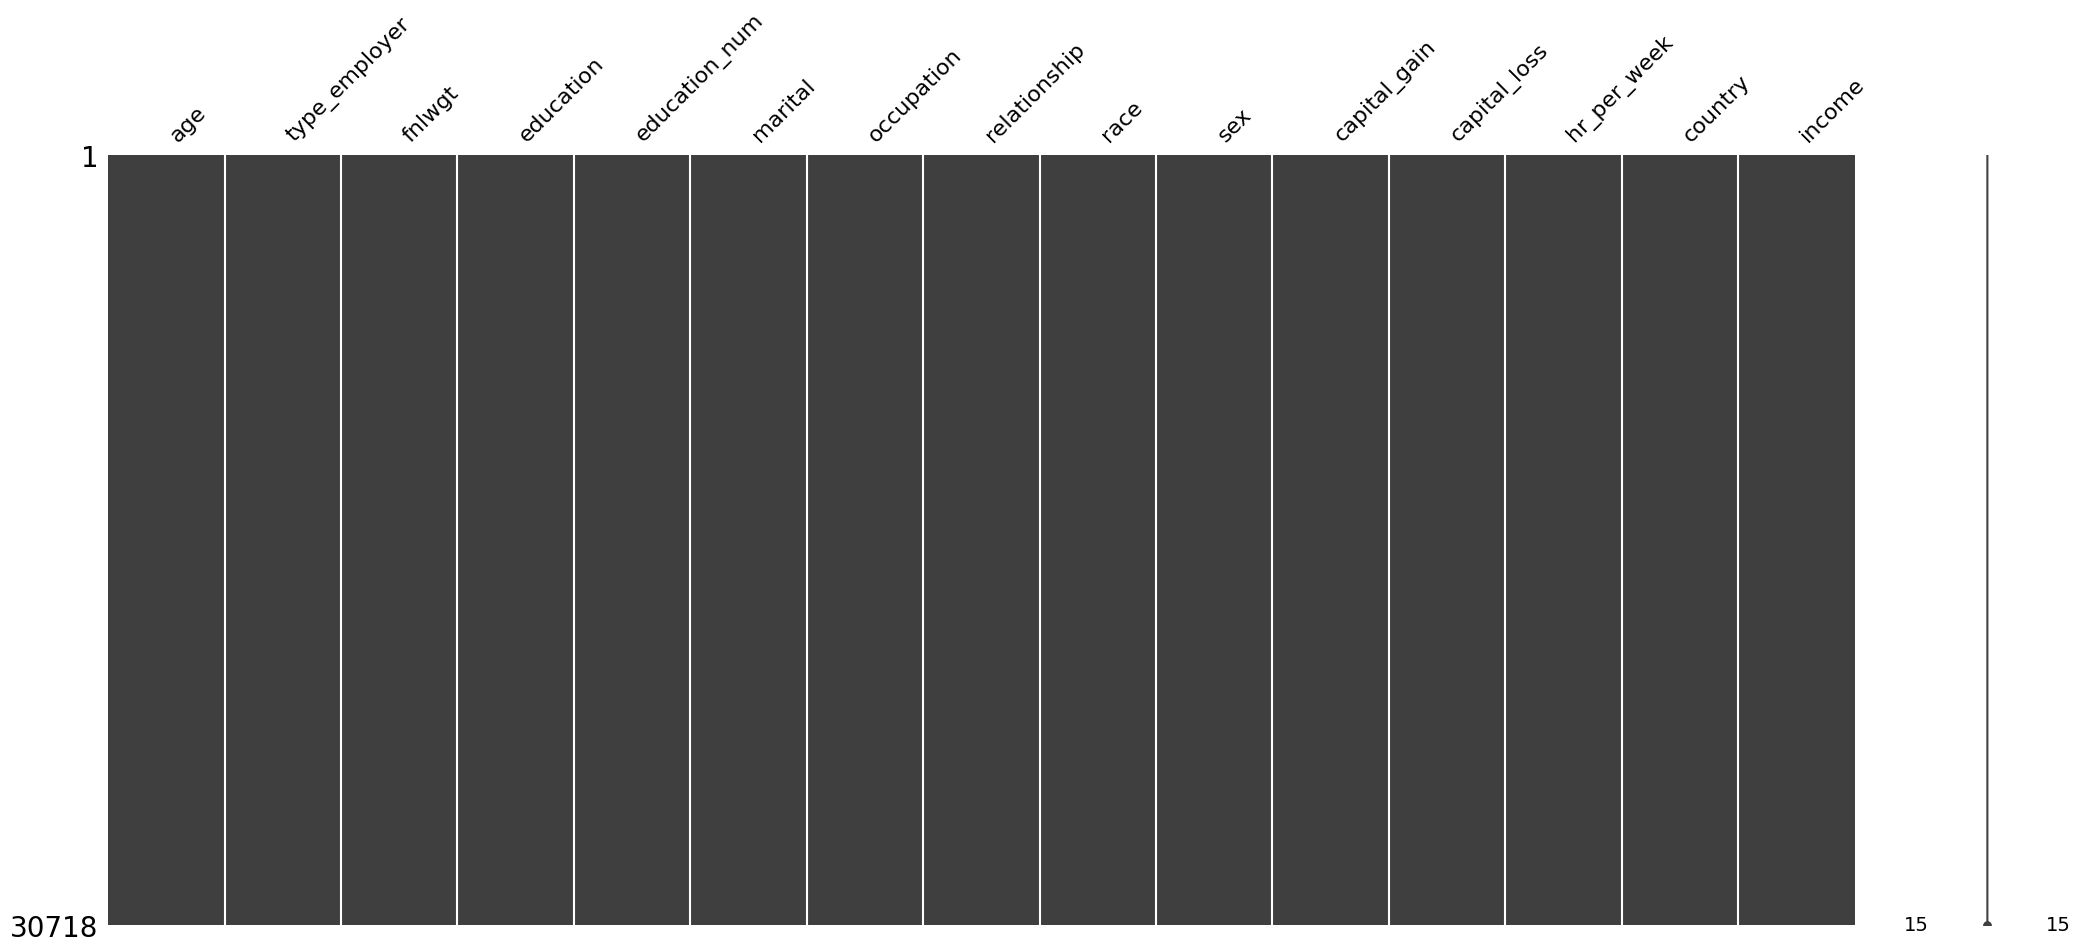

In [32]:
msno.matrix(df)

<h2>Data Exploration</h2>

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            30718 non-null  int64   
 1   type_employer  30718 non-null  category
 2   fnlwgt         30718 non-null  int64   
 3   education      30718 non-null  category
 4   education_num  30718 non-null  int64   
 5   marital        30718 non-null  category
 6   occupation     30718 non-null  category
 7   relationship   30718 non-null  object  
 8   race           30718 non-null  object  
 9   sex            30718 non-null  object  
 10  capital_gain   30718 non-null  int64   
 11  capital_loss   30718 non-null  int64   
 12  hr_per_week    30718 non-null  int64   
 13  country        30718 non-null  category
 14  income         30718 non-null  category
dtypes: category(6), int64(6), object(3)
memory usage: 2.5+ MB


In [34]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898455e+05,10.130314,1106.037079,88.910216,40.949313
std,13.118227,1.054583e+05,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Plot showing the income.

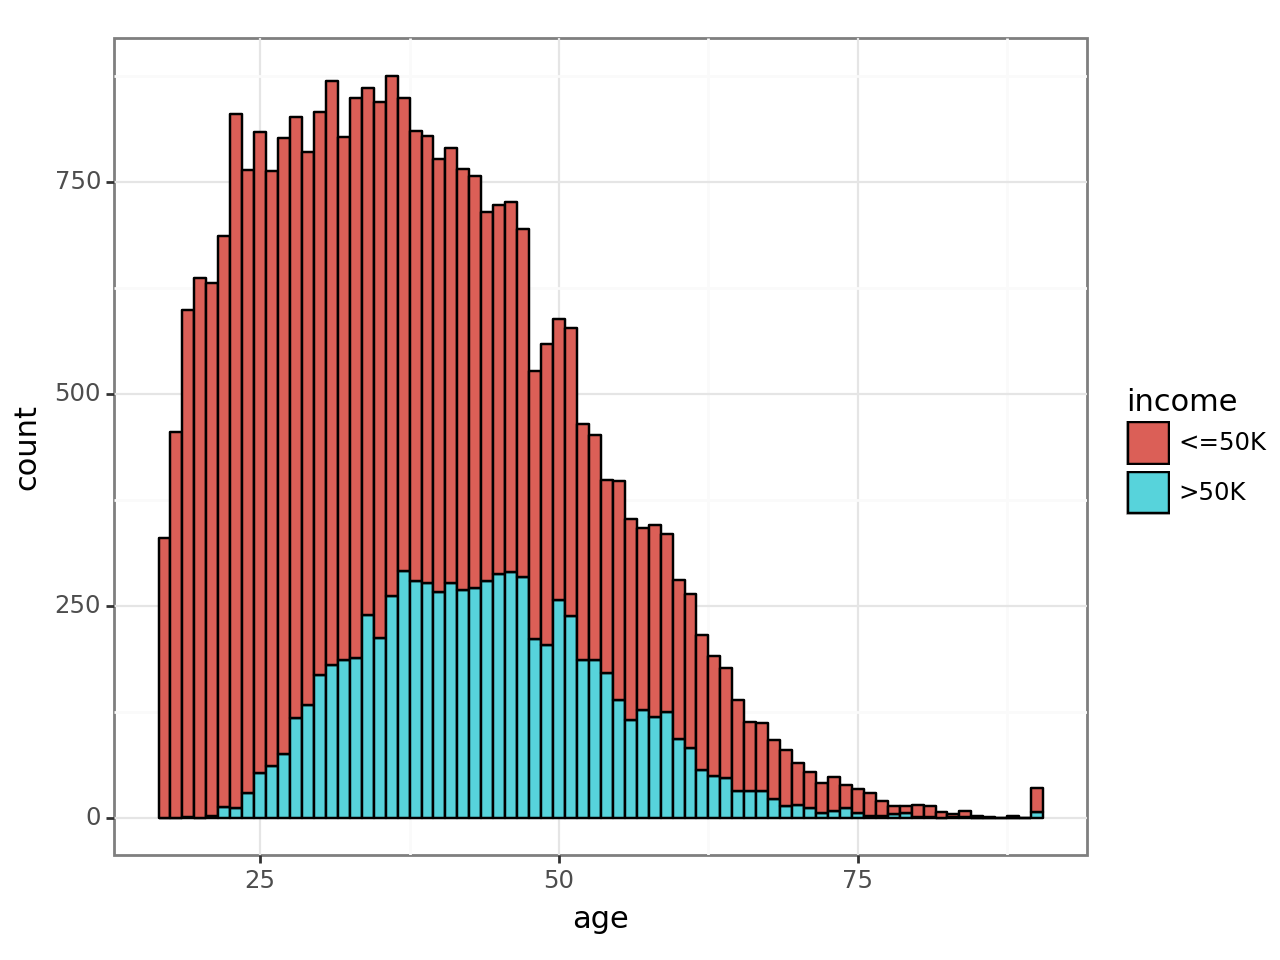

<Figure Size: (640 x 480)>

In [35]:
(ggplot(df, aes(x='age', fill='income')) + geom_histogram(color='black', binwidth=1) + theme_bw())

Plot showing the hours worked per week.

/home/ben/.local/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 307'. Pick better value with 'binwidth'.


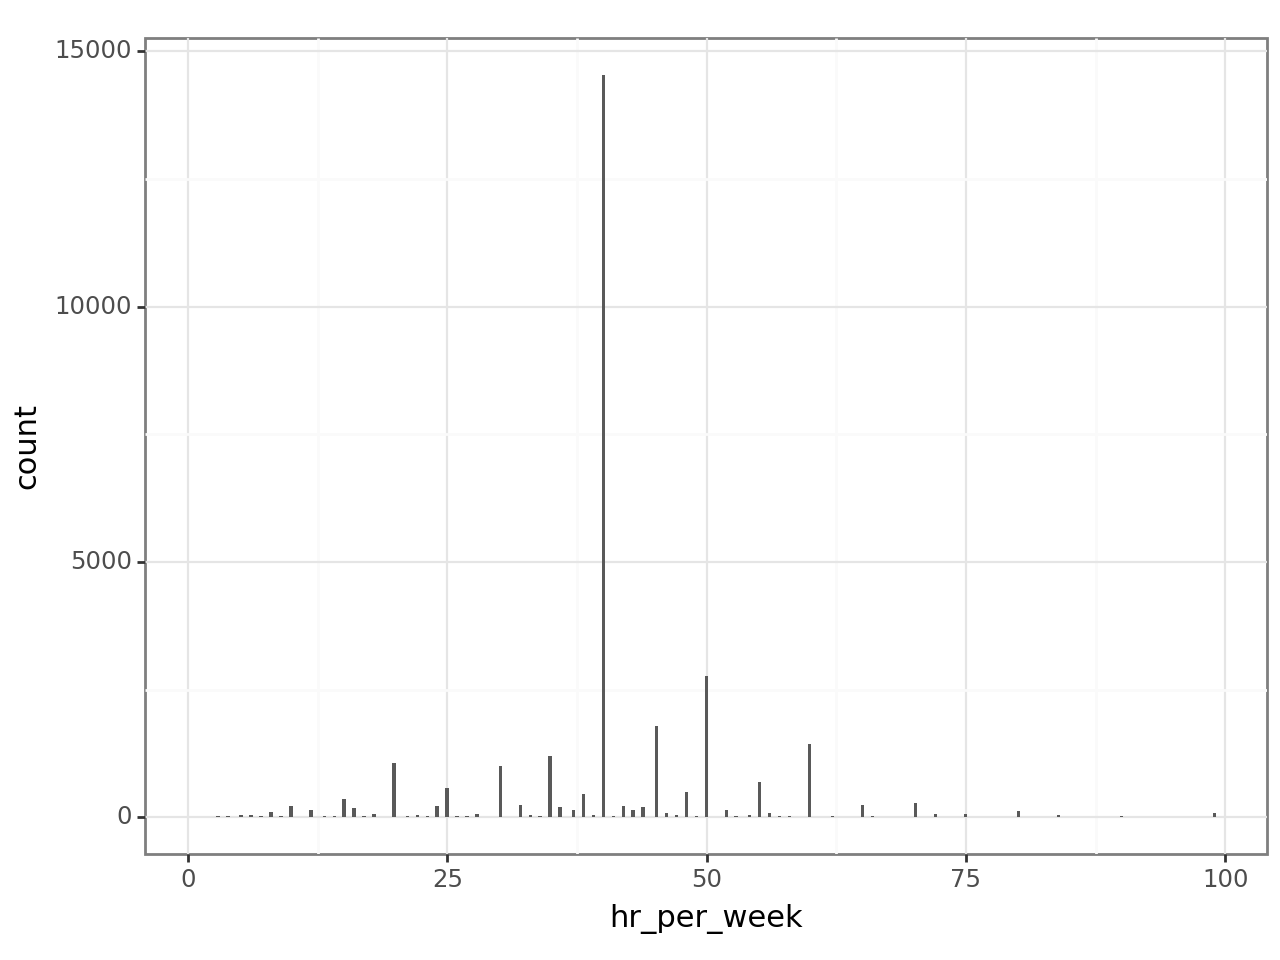

<Figure Size: (640 x 480)>

In [36]:
(ggplot(df, aes(x='hr_per_week')) +
 geom_histogram() +
 theme_bw())

I'll rename the country column to region column to better reflect the factor levels.

In [37]:
df.rename(columns={'country': 'region'}, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            30718 non-null  int64   
 1   type_employer  30718 non-null  category
 2   fnlwgt         30718 non-null  int64   
 3   education      30718 non-null  category
 4   education_num  30718 non-null  int64   
 5   marital        30718 non-null  category
 6   occupation     30718 non-null  category
 7   relationship   30718 non-null  object  
 8   race           30718 non-null  object  
 9   sex            30718 non-null  object  
 10  capital_gain   30718 non-null  int64   
 11  capital_loss   30718 non-null  int64   
 12  hr_per_week    30718 non-null  int64   
 13  region         30718 non-null  category
 14  income         30718 non-null  category
dtypes: category(6), int64(6), object(3)
memory usage: 2.5+ MB


A barplot of region with the fill colour showing income class.

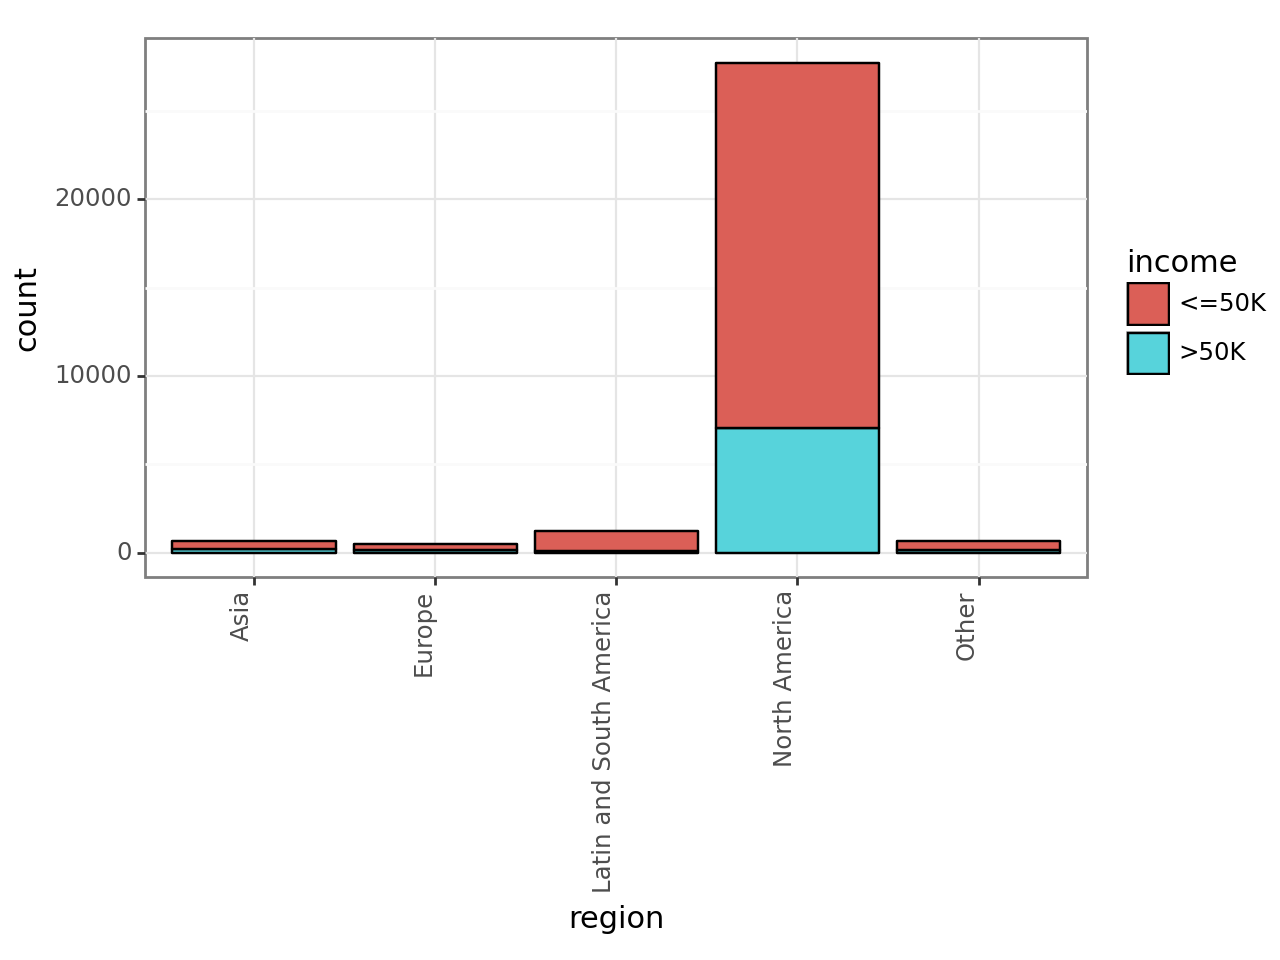

<Figure Size: (640 x 480)>

In [39]:
(ggplot(df, aes(x='region', fill='income')) +
 geom_bar(color='black') +
 theme_bw() +
 theme(axis_text_x=element_text(angle=90, hjust=1)))


<h1>Building a Model</h1>
Logistic Regression is a type of classification model. With the classification model I will attempt to predict the outcome of categorical dependent variabls, using on or more independent variables. The independent variables can be either categorical or numerical.
Logistic regression is based on the logistic function, which always takes values between 0 and 1. Replacing the dependent variable of the logistic function with a linear combination of dependent variables we intend to use for regression, we arrive at the formula for logistic regression.

In [40]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
0,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,<=50K
1,50,Self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North America,<=50K
2,38,Private,215646,HS-grad,9,Not-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North America,<=50K
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North America,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin and South America,<=50K


<h2>Training Test Split</h2>
We'll split the data into a train and test set using the sklearn model selection library.

In [41]:
np.random.seed(101)
train, test = train_test_split(df, test_size=0.3)

In [42]:
train.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
4106,40,Private,238329,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,45,North America,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Asia,<=50K
28533,36,Private,181322,Bachelors,13,Not-married,Exec-managerial,Not-in-family,White,Female,0,0,45,North America,<=50K
1674,47,Private,170846,Assoc-acdm,12,Married,Adm-clerical,Wife,White,Female,0,0,40,Europe,>50K
32474,36,Private,186819,Assoc-acdm,12,Married,Craft-repair,Husband,White,Male,0,0,52,North America,>50K


In [43]:
#train = df[df['income'] == True]
#test = df[df['income'] == False]
train_y = train['income']
train_x = train.drop('income', axis=1)
train_y.head()

4106     <=50K
32553    <=50K
28533    <=50K
1674      >50K
32474     >50K
Name: income, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [44]:
train_x.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region
4106,40,Private,238329,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,45,North America
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Asia
28533,36,Private,181322,Bachelors,13,Not-married,Exec-managerial,Not-in-family,White,Female,0,0,45,North America
1674,47,Private,170846,Assoc-acdm,12,Married,Adm-clerical,Wife,White,Female,0,0,40,Europe
32474,36,Private,186819,Assoc-acdm,12,Married,Craft-repair,Husband,White,Male,0,0,52,North America


In [45]:
le = LabelEncoder()
train_x['type_employer'] = le.fit_transform(train_x['type_employer'])
train_x['education'] = le.fit_transform(train_x['education'])
train_x['marital'] = le.fit_transform(train_x['marital'])
train_x['occupation'] = le.fit_transform(train_x['occupation'])
train_x['relationship'] = le.fit_transform(train_x['relationship'])
train_x['race'] = le.fit_transform(train_x['race'])
train_x['sex'] = le.fit_transform(train_x['sex'])
train_x['region'] = le.fit_transform(train_x['region'])
train_x.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region
4106,40,2,238329,9,13,1,11,1,4,0,0,0,45,3
32553,32,2,116138,12,14,1,12,1,1,1,0,0,11,0
28533,36,2,181322,9,13,2,3,1,4,0,0,0,45,3
1674,47,2,170846,7,12,0,0,5,4,0,0,0,40,1
32474,36,2,186819,7,12,0,2,0,4,1,0,0,52,3


<h2>Training the Model</h2>
Statsmodel is used to fit generalised linear models, specified by giving a symbolic description of the linear predictor and a description of the error distribution.

<h3>Details</h3>
A typical predictor has the form response - terms where response is the (numeric) response vector and terms is a series of terms which specifies a linear predictor for response. For binominal and quasibinomial familes the response can also be specified as a factor (when the first level denotes failure and all others success) or as a two-column matrix with the columns giving the numbers of successes and failures. A terms specification of the form list + second indicates all the terms in first together with all the terms in second with any duplicates removed.

In [46]:
model = LogisticRegression(solver='sag', max_iter=10000000, C=1.0)
model.fit(train_x, train_y)

LogisticRegression(max_iter=10000000, solver='sag')

<h2>Test the Model</h2>

In [47]:
test_y = test['income']
test_x = test.drop('income', axis=1)
test_y.head()

18830    <=50K
20370    <=50K
31525    <=50K
21000    <=50K
22634     >50K
Name: income, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [48]:
test_x['type_employer'] = le.fit_transform(test_x['type_employer'])
test_x['education'] = le.fit_transform(test_x['education'])
test_x['marital'] = le.fit_transform(test_x['marital'])
test_x['occupation'] = le.fit_transform(test_x['occupation'])
test_x['relationship'] = le.fit_transform(test_x['relationship'])
test_x['race'] = le.fit_transform(test_x['race'])
test_x['sex'] = le.fit_transform(test_x['sex'])
test_x['region'] = le.fit_transform(test_x['region'])
test_x.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region
18830,22,2,157145,8,11,1,2,3,4,1,0,0,50,3
20370,56,2,267652,9,13,0,2,0,4,1,0,0,40,3
31525,42,2,191765,11,9,2,7,2,2,0,0,0,35,3
21000,43,2,243380,15,10,0,0,0,4,1,0,0,40,3
22634,42,2,214503,9,13,0,9,0,4,1,0,0,44,3


In [59]:
y_pred = model.predict(test_x)
print(y_pred)

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']


In [50]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred, pos_label='>50K')
recall = recall_score(test_y, y_pred, pos_label='>50K')
f1 = f1_score(test_y, y_pred, pos_label='>50K')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7945963541666666
Precision: 0.7215332581736189
Recall: 0.2799650043744532
F1-score: 0.4034037188780334


<h3>Scores Explained</h3>

Typical ranges for the four scores above are:
<ul>
    <li><b>Accuracy:</b>0.5 (random) to 1.0 (perfect)</li>
    <li><b>Precision:</b>0.0 to 1.0 (higher is better)</li>
    <li><b>Recall:</b>0.0 to 1.0 (higher is better)</li>
    <li><b>F1-Score:</b>0.0 to 1.0 (higher is better)</li>
</ul>

Comparing the model's scores with the typical ranges shows that it has performed with high accuracy and precision but low on recall and f1 score.

<h5>Accuracy (0.7945):</h5>
<ul>
    <li>This indicates that the model correctly classifies 79% of the instances in the test data.</li>
    <li>In isolation, this seems promising but I need to consier:</li>
    <ul>
        <li>Task Goal: If catching false negatives is crucial, even a small percentage can be significant</li>
        <li>Baseline performance: compare to random guessing or a simple model to see if its a true improvement</li>
    </ul>
</ul>
<h5>Precision (0.7215)</h5>
<ul>
    <li>This means 72% of the time, the model predicts a positive, its actually correct.</li>
    <li>This suggest a good precion, but:</li>
    <ul>
        <li>Class imbalance, check if theres a signicant class imbalance e.g, few positive cases) Precision can be misleading in such cases</li>
    </ul>
</ul>
<h5>Recall (0.2799)</h5>
<ul>
    <li>This indicates that the model only identifies 27% of the actual positive cases.</li>
    <li>This is quite low, suggesting the model misses many true positives. I will explore this by creating a confusion matrix in the next section</li>
</ul>
<h5>F1-Score (0.4034)</h5>
<ul>
    <li>This combines precision and recall, considering both aspects.</li>
</ul>

In [52]:
actual = test_y
actual.head()

18830    <=50K
20370    <=50K
31525    <=50K
21000    <=50K
22634     >50K
Name: income, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [60]:
predict = y_pred

In [61]:
confusion_matrix = metrics.confusion_matrix(actual, predict)

In [62]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

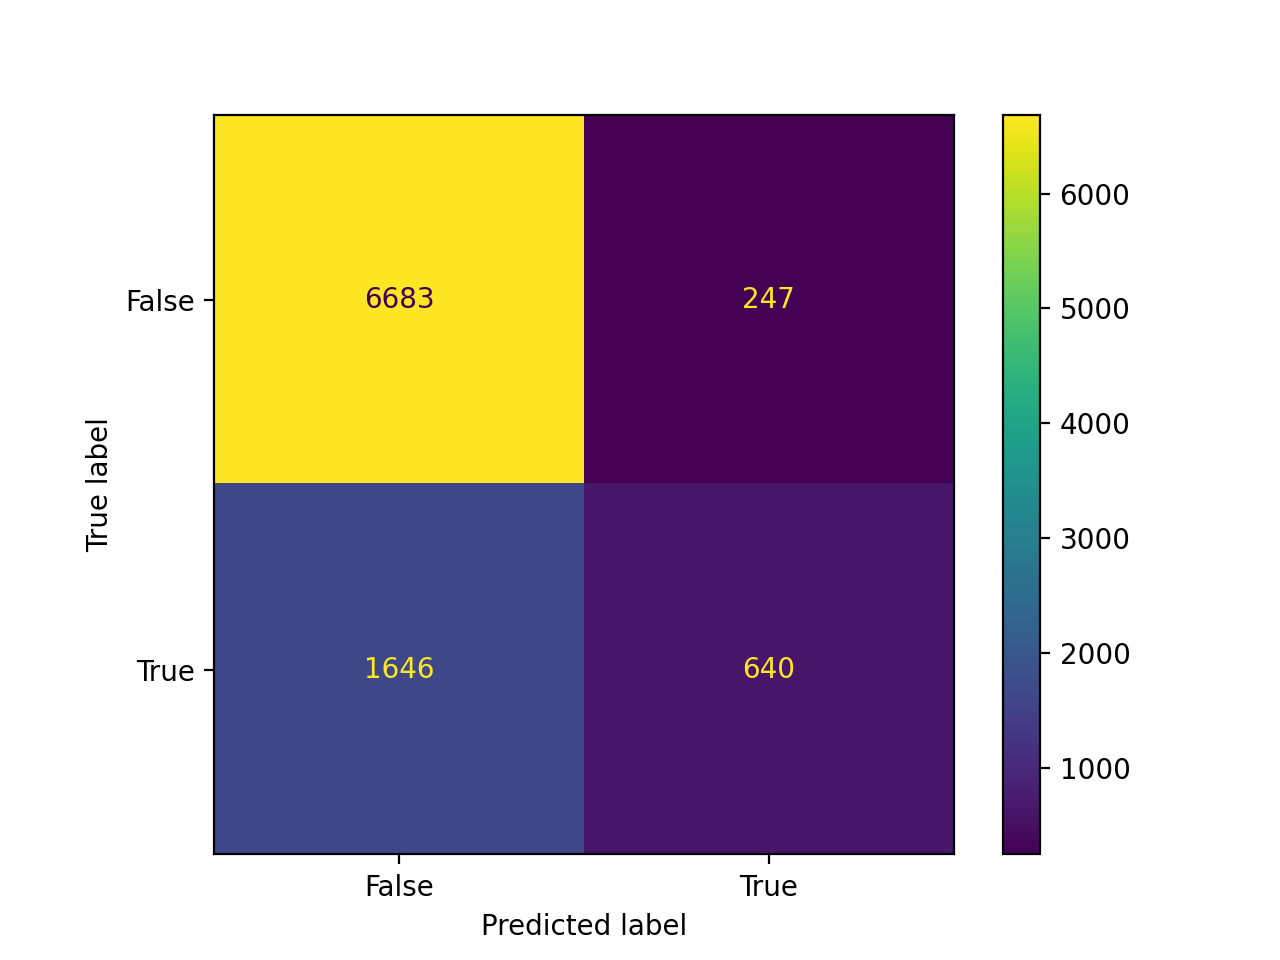

In [63]:
cm_display.plot()
plt.show()